In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
data = pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            9999 non-null   int64  
 1   type            9999 non-null   object 
 2   amount          9999 non-null   float64
 3   nameOrig        9999 non-null   object 
 4   oldbalanceOrg   9999 non-null   float64
 5   newbalanceOrig  9999 non-null   float64
 6   nameDest        9999 non-null   object 
 7   oldbalanceDest  9999 non-null   float64
 8   newbalanceDest  9999 non-null   float64
 9   isFraud         9999 non-null   int64  
 10  isFlaggedFraud  9999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.4+ KB


In [85]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,9999.000000,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9999.000000,9999.0
mean,4.178618,1.035565e+05,8.940319e+05,9.153758e+05,9.343548e+05,1.096991e+06,0.006801,0.0
std,2.479784,2.663187e+05,2.135847e+06,2.181598e+06,2.676441e+06,3.015963e+06,0.082189,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,4.397480e+03,1.273750e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,1.286936e+04,2.137011e+04,1.034255e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.143832e+05,1.785728e+05,1.760997e+05,2.831662e+05,2.520552e+05,0.000000,0.0
max,7.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,1.920000e+07,1.000000,0.0


In [86]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<AxesSubplot:xlabel='type', ylabel='count'>

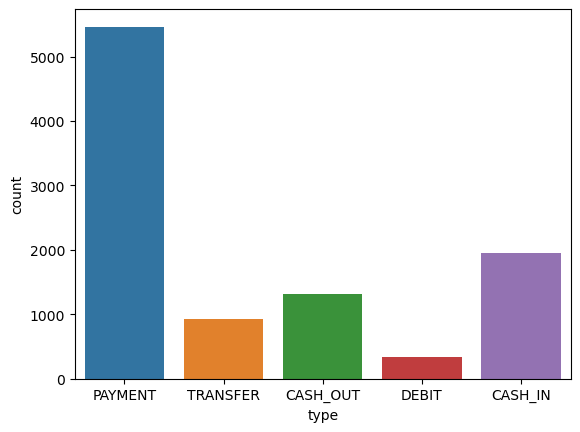

In [87]:
sns.countplot(x='type', data=data)

<AxesSubplot:xlabel='type', ylabel='amount'>

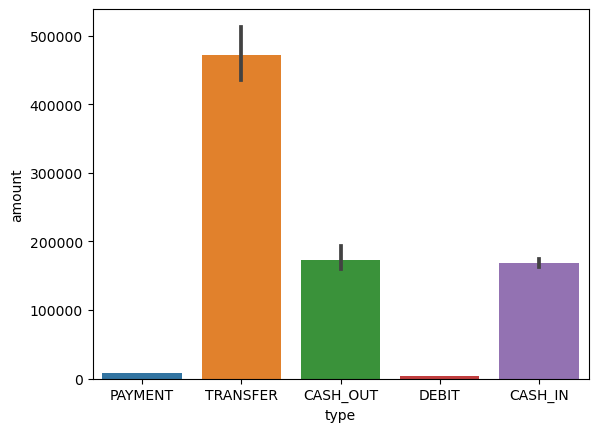

In [88]:
sns.barplot(x='type', y='amount', data=data)

In [89]:
data.isFraud.value_counts()

0    9931
1      68
Name: isFraud, dtype: int64

In [90]:
type_new = pd.get_dummies(data.type, drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [91]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
Y = data_new.isFraud
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [92]:
X.shape, Y.shape

((9999, 11), (9999,))

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [95]:
from sklearn.metrics import roc_auc_score as RAS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  

In [97]:
models = [LogisticRegression(),RandomForestClassifier(n_estimators=7,criterion='entropy',
                random_state=7),KNeighborsClassifier(n_neighbors=120, metric='minkowski', p=2)]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(Y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(Y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.9703352187390151
Validation Accuracy :  0.9623928378437587

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  0.9999840219857477
Validation Accuracy :  0.9110718406332607

KNeighborsClassifier(n_neighbors=120) : 
Training Accuracy :  0.9710877832103025
Validation Accuracy :  0.916607030713733

